<a href="https://colab.research.google.com/github/Rishabh8827/Machine-Learning---Summer-Training/blob/main/Day%203/Day3_Comparision_Of_Regression_Algo's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***To See Final Result - Go To The Last Cell (Final Evaluation Of All Regression Algorithms)***

---



# Importing Libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset From Google Drive (Student_Marks.csv)
Dataset Source - [Student Marks Dataset - Kaggle](https://www.kaggle.com/datasets/yasserh/student-marks-dataset)



In [172]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Student_Marks.csv")
print(data.shape, '\n')
data.head(10)

(100, 3) 



,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


# Checking For Null values

In [154]:
data.isnull().mean()

number_courses    0.0
time_study        0.0
Marks             0.0
dtype: float64

# Exploring Dataset (Plotings)

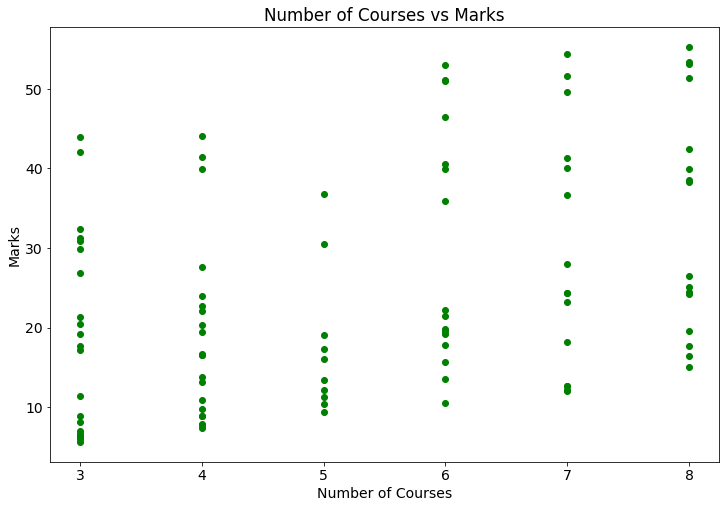

In [155]:
plt.rcParams.update({'figure.figsize': [12.0, 8.0],'font.size': 14})
plt.scatter(x=data['number_courses'], y=data['Marks'], c='g')
plt.xlabel("Number of Courses")
plt.ylabel("Marks")
plt.title("Number of Courses vs Marks");

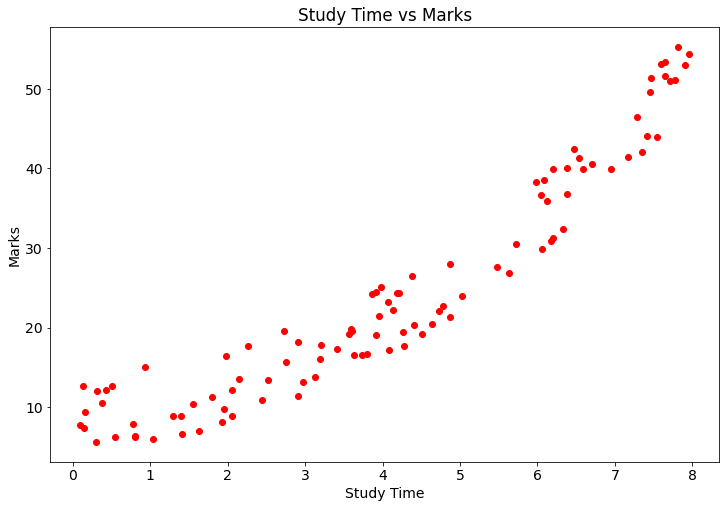

In [156]:

plt.scatter(x=data['time_study'], y=data['Marks'], c='r')
plt.xlabel("Study Time")
plt.ylabel("Marks")
plt.title("Study Time vs Marks");

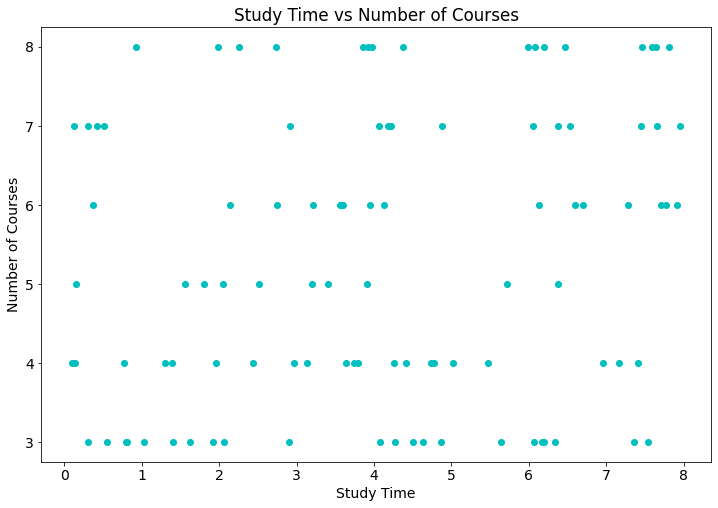

In [157]:
plt.scatter(x=data['time_study'], y=data['number_courses'], c='c')
plt.xlabel("Study Time")
plt.ylabel("Number of Courses")
plt.title("Study Time vs Number of Courses");

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Splitting the data intro training & testing sets
target = 'Marks'
m=[]
for i in data.columns.values:
    m.append(i.replace(' ','_'))
    
data.columns = m
X = data.drop([target],axis=1)
Y = data[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (100, 2) (100,) 
Training set  --->  (80, 2) (80,) 
Testing set   --->  (20, 2)  (20,)


# Feature Scaling (Standardization - StandardScaler)

In [159]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,number_courses,time_study
count,80.000000,8.000000e+01
mean,0.000000,-4.996004e-17
std,1.006309,1.006309e+00
min,-1.231606,-1.710350e+00
25%,-0.684226,-8.638663e-01
50%,-0.136845,-1.695124e-02
75%,0.957916,8.807528e-01
max,1.505297,1.680330e+00



                                          Standardardization on Testing set                                          


,number_courses,time_study
count,20.000000,20.000000
mean,0.109476,0.034161
std,0.913788,1.116633
min,-1.231606,-1.691372
25%,-0.684226,-0.709127
50%,0.410535,0.098861
75%,0.547381,0.965293
max,1.505297,1.501759


# Ploting Correlation Matrix

                                       Correlation Matrix                                       


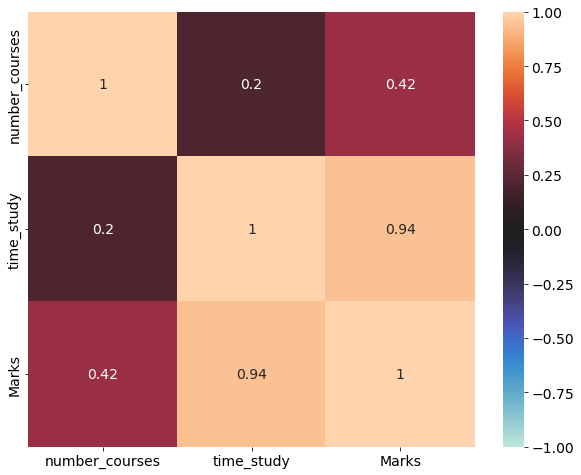

In [160]:
#Checking the correlation

import seaborn as sns
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[10,8])
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0) 
plt.show()

# Creating Evaluation Function For Evaluation Of All Regression Algo's

In [161]:
#Let us first define a function to evaluate our models

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

# 0 : Linear Regression

<<<----------------------------------- Evaluating Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


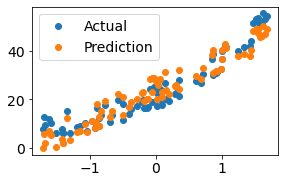



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9404526569528092
Residual Sum of Squares (RSS) on Training set  ---> 964.4065702195882
Mean Squared Error (MSE) on Training set       ---> 12.055082127744853
Root Mean Squared Error (RMSE) on Training set ---> 3.4720429328775375

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9381738467744822
Residual Sum of Squares (RSS) on Training set  ---> 252.92972489462701
Mean Squared Error (MSE) on Training set       ---> 12.64648624473135
Root Mean Squared Error (RMSE) on Training set ---> 3.556189849365659

--------------------Residual Plots--------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


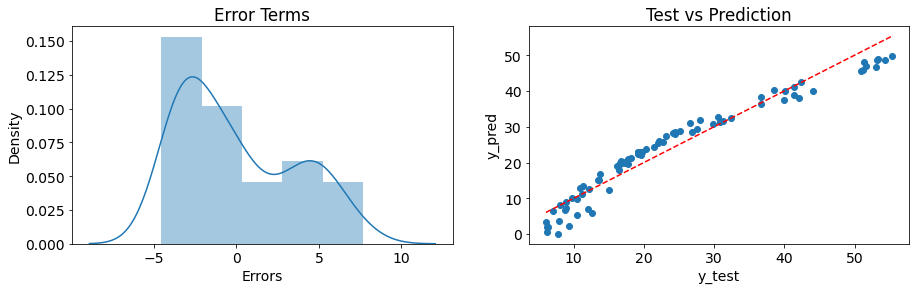

In [162]:
from sklearn.linear_model import LinearRegression

#Linear Regression
lr_model = LinearRegression()

lr_model.fit(Train_X_std, Train_Y)
pred1 = lr_model.predict(Train_X_std)
pred2 = lr_model.predict(Test_X_std)

print('{}{}\033[1m Evaluating Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',lr_model.coef_)
print('The Intercept of the Regresion Model was found to be ',lr_model.intercept_)

Evaluate(0, pred1, pred2)

# 1 : Multiple Linear Regression

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


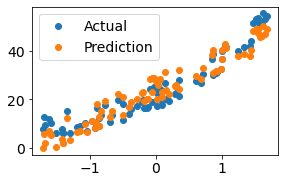



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9404526569528092
Residual Sum of Squares (RSS) on Training set  ---> 964.4065702195882
Mean Squared Error (MSE) on Training set       ---> 12.055082127744853
Root Mean Squared Error (RMSE) on Training set ---> 3.4720429328775375

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9381738467744822
Residual Sum of Squares (RSS) on Training set  ---> 252.92972489462701
Mean Squared Error (MSE) on Training set       ---> 12.64648624473135
Root Mean Squared Error (RMSE) on Training set ---> 3.556189849365659

--------------------Residual Plots--------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


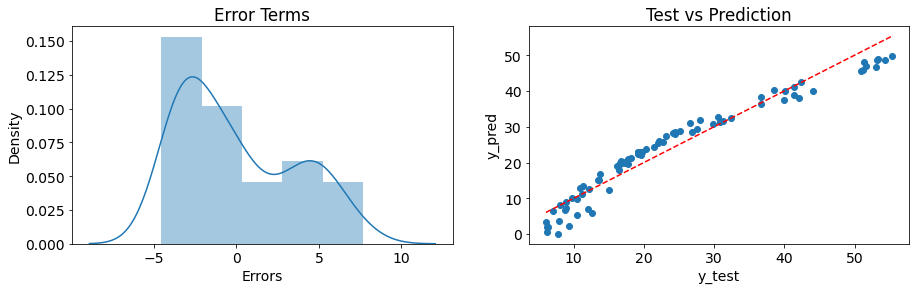

In [163]:
#Multiple Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

# 2 : Random Forest Regressor

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>



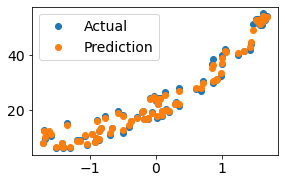



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9981461431163269
Residual Sum of Squares (RSS) on Training set  ---> 30.02437501610073
Mean Squared Error (MSE) on Training set       ---> 0.37530468770125913
Root Mean Squared Error (RMSE) on Training set ---> 0.6126211616498888

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9756647574753862
Residual Sum of Squares (RSS) on Training set  ---> 99.55505681460015
Mean Squared Error (MSE) on Training set       ---> 4.977752840730007
Root Mean Squared Error (RMSE) on Training set ---> 2.2310878155576948

--------------------Residual Plots--------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


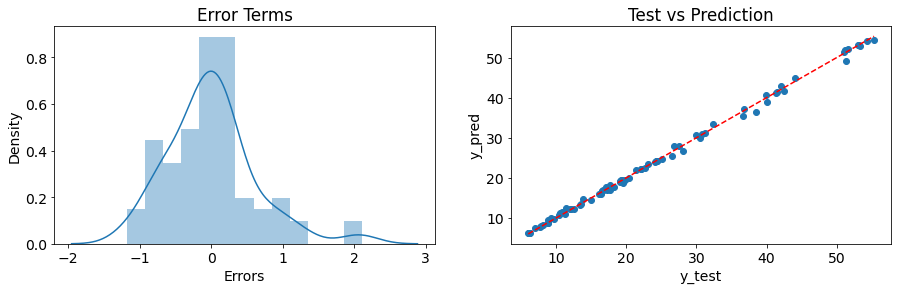

In [164]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor

rf_model = RandomForestRegressor()

rf_model.fit(Train_X_std, Train_Y)
pred1 = rf_model.predict(Train_X_std)
pred2 = rf_model.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))

Evaluate(2, pred1, pred2)

# 3 : Polynomial Regression

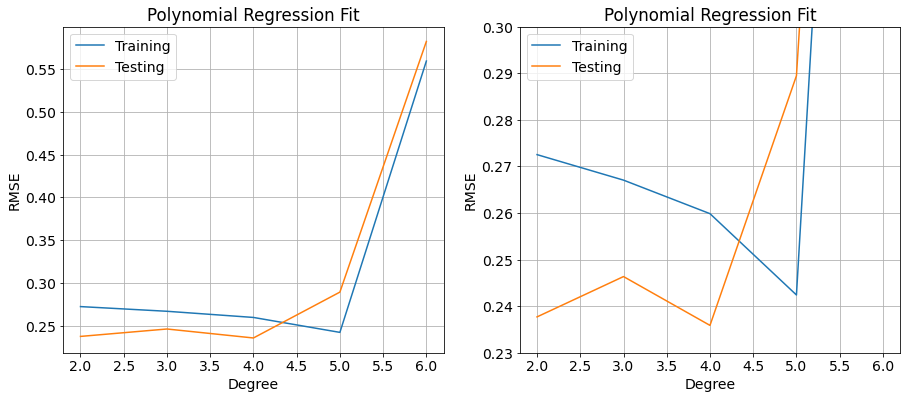

In [165]:
#Checking polynomial regression performance on various degrees
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]
n_degree=7

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0.23,0.3])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


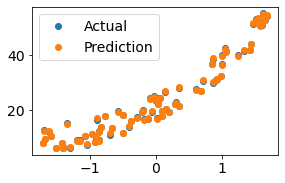



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9997097318617344
Residual Sum of Squares (RSS) on Training set  ---> 4.70107456258825
Mean Squared Error (MSE) on Training set       ---> 0.058763432032353125
Root Mean Squared Error (RMSE) on Training set ---> 0.24241169945436447

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9995903927979447
Residual Sum of Squares (RSS) on Training set  ---> 1.6756959882786904
Mean Squared Error (MSE) on Training set       ---> 0.08378479941393453
Root Mean Squared Error (RMSE) on Training set ---> 0.28945604055527074

--------------------Residual Plots--------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


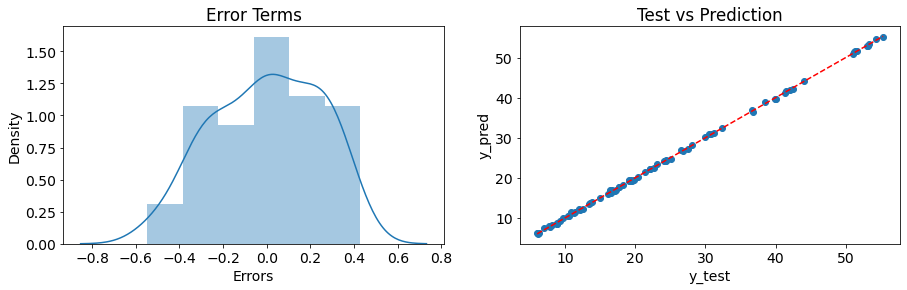

In [166]:
#Using the 5th Order Polynomial Regression model (degree=5)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

# 4 : Decision Tree Regressor

<<<----------------------------------- Evaluating Decision Tree Regression Model ----------------------------------->>>



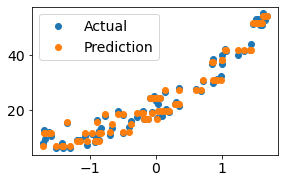



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9950967604425307
Residual Sum of Squares (RSS) on Training set  ---> 79.41104006666666
Mean Squared Error (MSE) on Training set       ---> 0.9926380008333332
Root Mean Squared Error (RMSE) on Training set ---> 0.9963122004840316

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9672293278045816
Residual Sum of Squares (RSS) on Training set  ---> 134.06425388888906
Mean Squared Error (MSE) on Training set       ---> 6.703212694444454
Root Mean Squared Error (RMSE) on Training set ---> 2.589056332806309

--------------------Residual Plots--------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


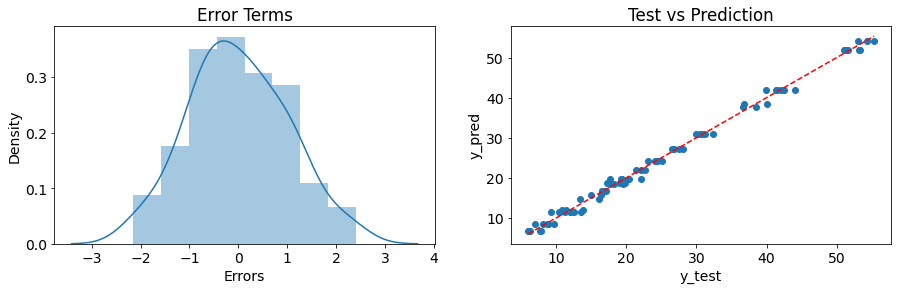

In [167]:
from sklearn.tree import DecisionTreeRegressor 

DTR = DecisionTreeRegressor(random_state=42,ccp_alpha=0.1) 

DTR.fit(Train_X_std, Train_Y)
pred1 = DTR.predict(Train_X_std)
pred2 = DTR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Decision Tree Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
Evaluate(4, pred1, pred2)

# 5 : Support Vector Regressor

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>



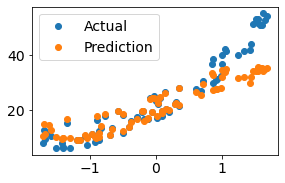



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.7704947779885104
Residual Sum of Squares (RSS) on Training set  ---> 3716.9810218430503
Mean Squared Error (MSE) on Training set       ---> 46.46226277303813
Root Mean Squared Error (RMSE) on Training set ---> 6.816323259135978

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8238947270917654
Residual Sum of Squares (RSS) on Training set  ---> 720.4436295219612
Mean Squared Error (MSE) on Training set       ---> 36.022181476098055
Root Mean Squared Error (RMSE) on Training set ---> 6.001848171696619

--------------------Residual Plots--------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


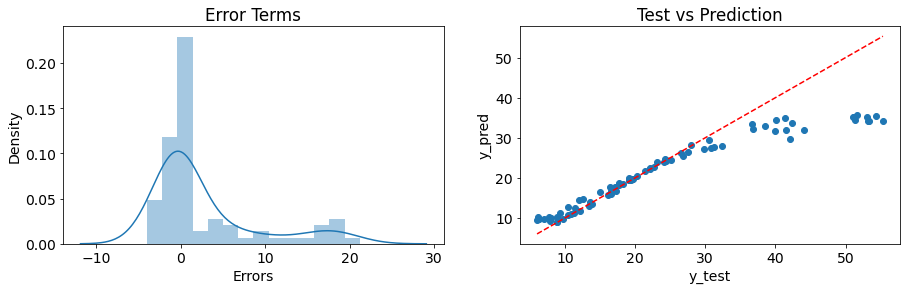

In [168]:
from sklearn.svm import SVR

# Support Vector Regressor

svr_model = SVR()

svr_model.fit(Train_X_std, Train_Y)
pred1 = svr_model.predict(Train_X_std)
pred2 = svr_model.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))

Evaluate(5, pred1, pred2)

# **✔ *Final Evaluation* Of All *Regression Algorithms***

In [169]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Linear Regression (LR)','Multiple Linear Regression (MLR)','Random Forest Regressor (RFR)','Polynomial Regression (PNR)','Decision Tree Regressor(DTR)','Support Vector Regressor (SVR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Linear Regression (LR),0.940453,0.938174,964.406570,252.929725,12.055082,12.646486,3.472043,3.556190
Multiple Linear Regression (MLR),0.940453,0.938174,964.406570,252.929725,12.055082,12.646486,3.472043,3.556190
Random Forest Regressor (RFR),0.998146,0.975665,30.024375,99.555057,0.375305,4.977753,0.612621,2.231088
Polynomial Regression (PNR),0.999710,0.999590,4.701075,1.675696,0.058763,0.083785,0.242412,0.289456
Decision Tree Regressor(DTR),0.995097,0.967229,79.411040,134.064254,0.992638,6.703213,0.996312,2.589056
Support Vector Regressor (SVR),0.770495,0.823895,3716.981022,720.443630,46.462263,36.022181,6.816323,6.001848


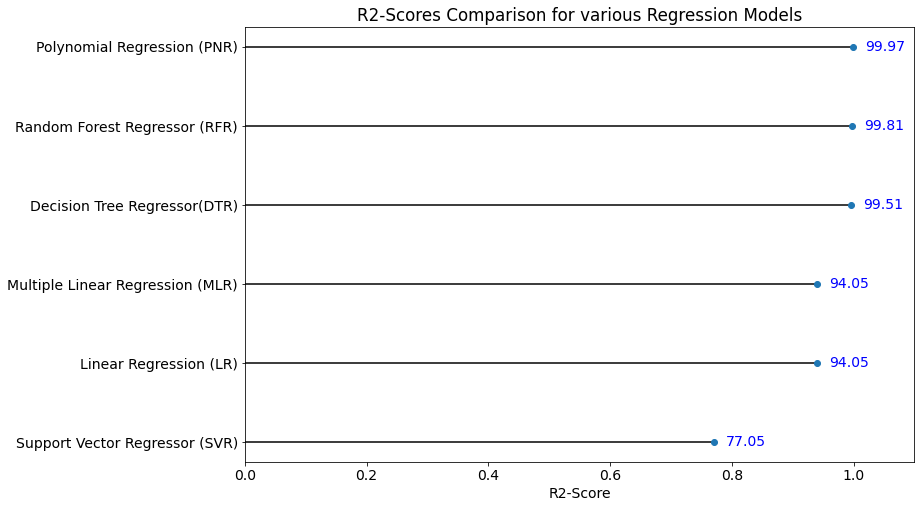

In [170]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

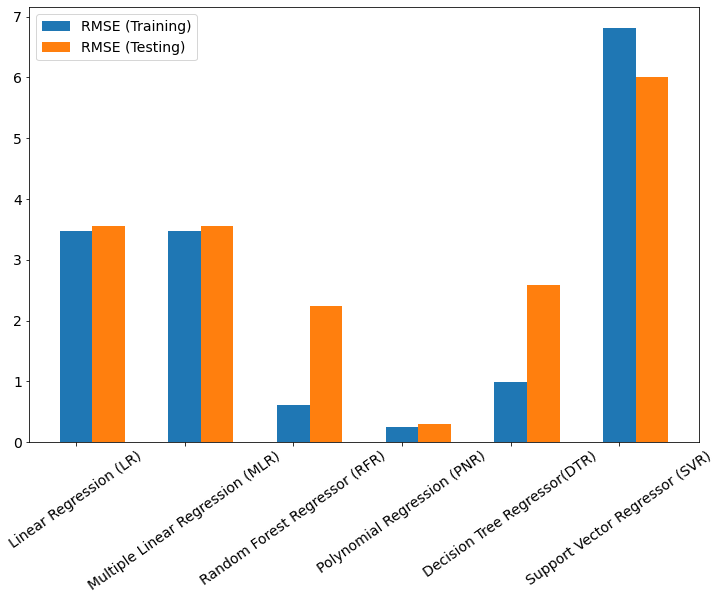

In [171]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=6
plt.bar(np.arange(6), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(6)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(6),EMC.index, rotation =35)
plt.legend()
plt.show()

# Conclusion:
Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that polynomial regressions clearly overfitting the current problem. Surprisingly simple MLR Model Or RFR Model or DTR Model gave the best results.